# Mahalanobis distance

In [82]:
import numpy as np
import pandas as pd
import scipy.sparse as scs
import scipy as sp

In [115]:
def mahalanobis(x, tfbs_mu, tfbs_stiff):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    #cg = cgdna(x).ground_state
    x_minus_mu = x - tfbs_mu
    inv_covmat = np.linalg.inv(tfbs_stiff) # not sure what stiffness is
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu)
    return mahal.item()


In [116]:
df = pd.read_csv('../data/cgdata/data_wgEncodeAwgTfbsHaibEcc1Foxa1sc6553V0416102Dm002p1hUniPk.csv')
df.drop(['seq','pssm','kl_sym'],axis=1,inplace=True)

In [117]:
tfbs = 'MA0148.3'

In [121]:
cg_mu = np.load(f'../data/data_avg_cgDNA_TFBS/gs_{tfbs}.npy')
cg_stiff = scs.load_npz(f'../data/data_avg_cgDNA_TFBS/stiff_MA0148.3.npz').todense()
cg = df.loc[1,:]
mahalanobis(cg,cg_mu,cg_stiff)

189.33638627973315

130.2596719031482

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

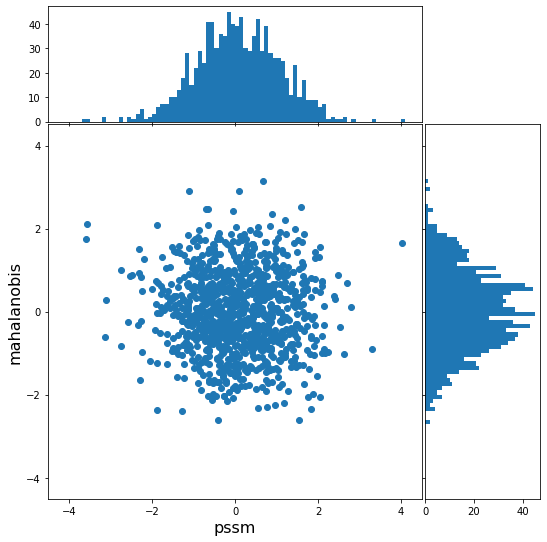

In [8]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
ax.set_ylabel('mahalanobis',fontsize=16)
ax.set_xlabel('pssm',fontsize=16)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()